In [14]:
# K-Nearest Neighbors on Diabetes Dataset

# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


# loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# data Preprocessing

# Columns where 0 is invalid
# for an example in these feature or attributes 0 does'nt hold any meaning.
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[columns_with_invalid_zeros] = df[columns_with_invalid_zeros].replace(0, np.nan)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[columns_with_invalid_zeros] = imputer.fit_transform(df[columns_with_invalid_zeros])


In [16]:
# feature scaling and train-test split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# K-NN classifier for different values of k

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


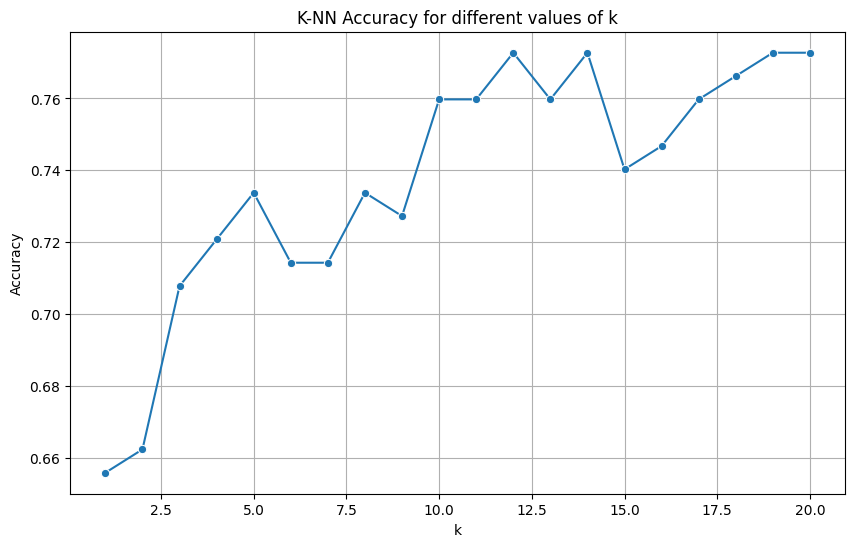



Best k: 12 with Accuracy: 0.7727


In [18]:
# plotting Accuracy vs k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K-NN Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"\n\nBest k: {best_k} with Accuracy: {max(accuracies):.4f}")


In [19]:
# feature scaling and train-test split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# normalizing features

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [20]:
# K-NN classifier for different values of k

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


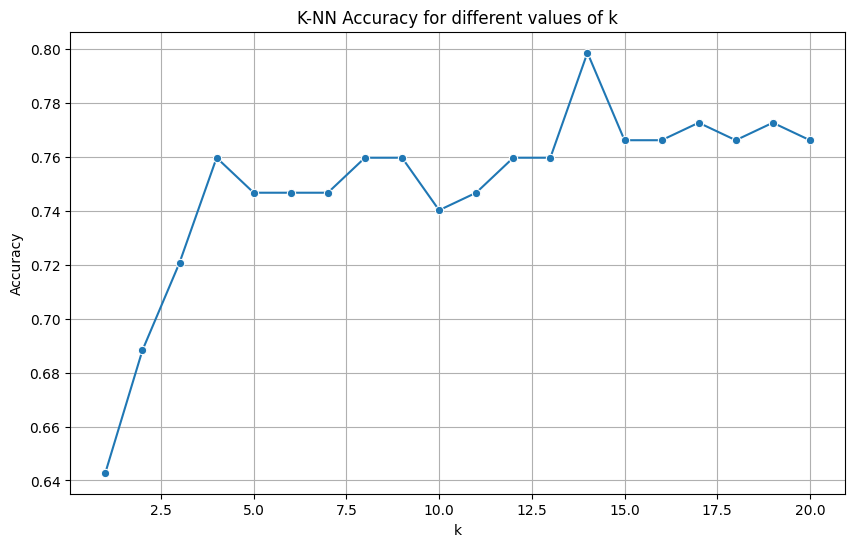



Best k: 14 with Accuracy: 0.7987


In [21]:
# plotting Accuracy vs k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K-NN Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"\n\nBest k: {best_k} with Accuracy: {max(accuracies):.4f}")


#-> As we can see that when we transform our datset using Standard Scaler we got the Acuuracy as 0.77

#-> But for Normalization we are getting Accuracy as approx 0.8

#-> So with this we can say that for this dataset normalization is best suitable. Hence we are proceeding with Normalization K - value

In [23]:
# Final Evaluation with Best k

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\n\nClassification Report:\n", class_report)


Confusion Matrix:
 [[89 10]
 [21 34]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [27]:
# manual Input and Prediction with User-friendly Output

input_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'Pedigree', 'Age']

print("Enter the following values:")
user_input = []
for feature in input_features:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Convert to DataFrame to preserve feature names( so that by doing this we wont get warning message)
user_df = pd.DataFrame([user_input], columns=input_features)

# Normalize(MinMaxScaling)
user_array_scaled = scaler.transform(user_df)

# Predict
prediction = best_knn.predict(user_array_scaled)[0]
result = "Diabetic" if prediction == 1 else "Not Diabetic"

print(f"\nPrediction Result: {result}")


Enter the following values:
Pregnancies: 1
Glucose: 80
BloodPressure: 66
SkinThickness: 23
Insulin: 80
BMI: 26
Pedigree: 0.5
Age: 32

Prediction Result: Not Diabetic
